In [1]:
from experiment import evaluate_algorithm
from algorithms import (
    E00PerfectAlgorithm,
    E01SimpleAlgorithm,
    E02SimpleAlgorithmRecallingMean,
    E03ShiftedStories,
    E04LossFN,
    E05LossFNShifted
)

# E00PerfectAlgorithm
This algorithm just uses the real length and the real sizes to prove that achieving perfect score is possible. It fails two sprints likely because of the sprints whose first story contains more points than the length of the sprint itself.

Total regret: 0; Nailed Sprints 5000Sprints overshoot 0


count    5000.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: point_distance, dtype: float64

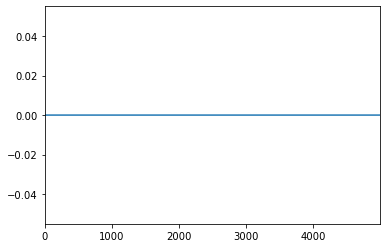

In [2]:
ev = evaluate_algorithm(E00PerfectAlgorithm, no_20=True)
ev.describe()

# E01SimpleAlgorithm
The algorithm that just assumes that every person does 1 point per day and does not care about real lengths or sizes.

Total regret: 142391; Nailed Sprints 24; Sprints overshoot 4940


count    5000.000000
mean      -17.260600
std         8.792505
min       -55.000000
25%       -23.000000
50%       -17.000000
75%       -11.000000
max         7.000000
Name: point_distance, dtype: float64

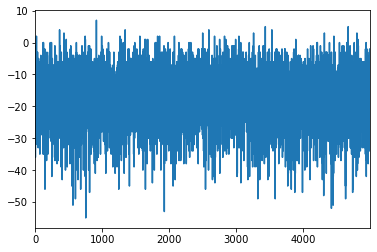

In [2]:
ev = evaluate_algorithm(E01SimpleAlgorithm, no_20=True)
ev.describe()

# E02SimpleAlgorithmRecallingMean

Total regret: 124500; Nailed Sprints 30; Sprints overshoot 4906


count    5000.000000
mean      -15.873200
std         8.726532
min       -52.000000
25%       -21.000000
50%       -15.000000
75%       -10.000000
max         9.000000
Name: point_distance, dtype: float64

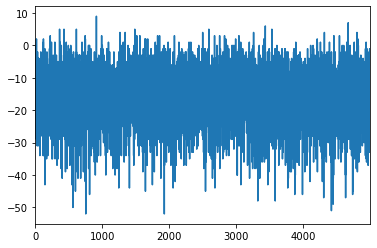

In [3]:
ev = evaluate_algorithm(E02SimpleAlgorithmRecallingMean, no_20=True)
ev.describe()

# E03ShiftedStories
Shifted stories approach shifts up the estimated sizes of the stories proportionally to their size and then estimates the length of the sprint in a similar way to that of `E02SimpleAlgorithmRecallingMean`

Total regret: 23627; Nailed Sprints 291; Sprints overshoot 3375


count    5000.000000
mean       -3.932000
std         7.108747
min       -38.000000
25%        -8.000000
50%        -3.000000
75%         1.000000
max        20.000000
Name: point_distance, dtype: float64

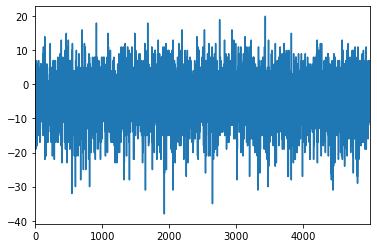

In [4]:
ev = evaluate_algorithm(E03ShiftedStories, no_20=True)
ev.describe()

# E04LossFn
This algorithm exploits the fact that the evaluator will use a regret matrix to estimate our penalisation and replicates such matrix in the decision. To minimise the regret it accepts a `regret_factor` that allows us to make the regret function more or less dramatic.

**Loss function approach with memory learning regret:**
Given that we allow a regret factor it would be great to learn its value for each sprint. To do so we come up with a bayesian estimation between what we chose in the past and what we should have chosen (the factor that would have returned exactly the length). However, this didn't work very well, 69k regret and 102 nailed sprints, mainly because of two reasons:
- We weren't including in our computations the uncertainty of the stories.
- The `estimate_length` method was unable to reach the real points in the sprint

Total regret: 15515; Nailed Sprints 231; Sprints overshoot 1733


count    5000.000000
mean        2.031200
std         8.016825
min       -33.000000
25%        -3.000000
50%         3.000000
75%         8.000000
max        24.000000
Name: point_distance, dtype: float64

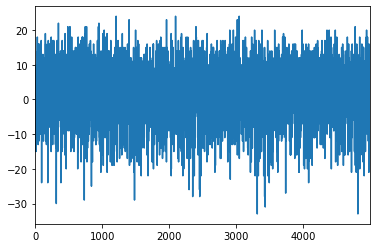

In [17]:
ev = evaluate_algorithm(E04LossFN, no_20=True, regret_factor=8.5)
ev.describe()

Total regret: 19242; Nailed Sprints 281; Sprints overshoot 2590


count    5000.000000
mean       -1.611600
std         7.490258
min       -38.000000
25%        -6.000000
50%        -1.000000
75%         4.000000
max        22.000000
Name: point_distance, dtype: float64

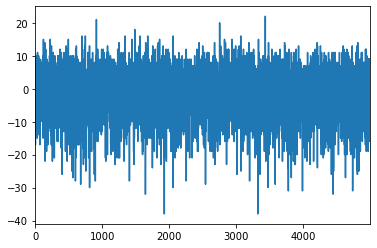

In [6]:
ev = evaluate_algorithm(E04LossFN, no_20=True, regret_factor=8)
ev.describe()

## E05LossFnShifted
Shifted stories worked rather well and also the loss function so in this algorithm we will mix both to reduce a bit more the regret.

Total regret: 12931; Nailed Sprints 309; Sprints overshoot 2168


count    5000.000000
mean        0.110400
std         6.783997
min       -31.000000
25%        -4.000000
50%         1.000000
75%         5.000000
max        24.000000
Name: point_distance, dtype: float64

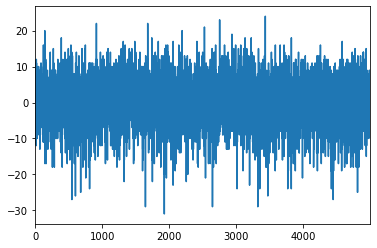

In [9]:
ev = evaluate_algorithm(E05LossFNShifted, no_20=True, regret_factor=2.5)
ev.describe()

Total regret: 11655; Nailed Sprints 305; Sprints overshoot 1828


count    5000.00000
mean        1.24480
std         6.70178
min       -34.00000
25%        -3.00000
50%         2.00000
75%         6.00000
max        25.00000
Name: point_distance, dtype: float64

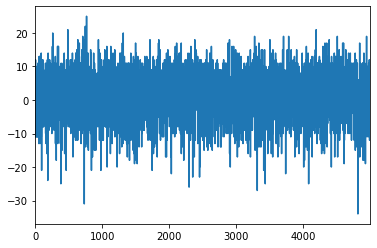

In [18]:
ev = evaluate_algorithm(E05LossFNShifted, no_20=True, regret_factor=3)
ev.describe()

Total regret: 10526; Nailed Sprints 224; Sprints overshoot 1294


count    5000.000000
mean        3.284600
std         6.555929
min       -30.000000
25%        -1.000000
50%         4.000000
75%         8.000000
max        27.000000
Name: point_distance, dtype: float64

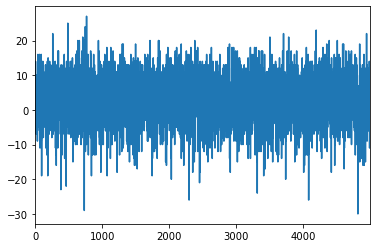

In [22]:
ev = evaluate_algorithm(E05LossFNShifted, no_20=True, regret_factor=4.5)
ev.describe()